# Spectrum-matching: posterior SFH's model prediction and true spectrum
To check if we can theoratically solve outshining in the sense of correcting the posterior SFH and getting more senible estimations of the older stellar populations, here I check if the model-predicted spectrum using the posterior fitted SFH from an SNR=15 run of Yirui's simulated PSB matches up with the true spectrum. If it does so very well, then it means there is a large degeneracy for the SFH parameters and there is no way we can combat outshining. If it significantly deviates, then there is still chance in theory.

In [1]:
import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt

Starting dense_basis. Failed to load FSPS, only GP-SFH module will be available.
running without emcee


In [30]:
# load in the true spectrum (un perturbed by observational uncertainties)
spectrum = np.loadtxt(fname="../Yirui_test_cube/snap119/with_PSF/with_dust/Spectrum_2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_with_PSF_with_dust_SNR15.csv", delimiter=',', skiprows=1)
spectrum[:,1] = spectrum[:,1]*10**-16
wavelengths = spectrum[:,0]

In [95]:
def make_model_components(Av, n, age, tau, massformed, metallicity, burstage, alpha, fburst, redshift):
    dust = {}
    dust["type"] = "CF00"
    dust["eta"] = 2.
    dust["Av"] = Av
    dust["n"] = n

    nebular = {}
    nebular["logU"] = -3.

    psb2 = {}
    psb2["age"] = age                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb2["tau"] = tau                   # Vary tau between 300 Myr and 10 Gyr
    psb2["massformed"] = massformed              # vary log_10(M*/M_solar) between 1 and 15
    psb2["metallicity"] = metallicity           # vary Z between 0.1 and 2.5 Z_solar

    psb2["burstage"] = burstage                   # age of burst from 0 to 2Gyr
    psb2["alpha"] = alpha              # decline of burst
    psb2["beta"] = 250.                    # rise of burst: fixed
    psb2["fburst"] = fburst

    model_components = {}
    model_components['psb2'] = psb2
    model_components['dust'] = dust
    model_components['nebular'] = nebular
    model_components['t_bc'] = 0.01
    model_components['redshift'] = redshift
    return model_components

def plot_spec(wavelengths, true_spec, model_spec, limit_to_9500=False):
    if limit_to_9500:
        to_ind = [wavelengths<9500]
        wavelengths = wavelengths[to_ind]
        true_spec = true_spec[to_ind]
        model_spec = model_spec[to_ind]
    fig = plt.figure(figsize=[15,5])
    gs = fig.add_gridspec(4,1, hspace=0, wspace=0)
    ax1 = plt.subplot(gs[:-1])
    ax2 = plt.subplot(gs[-1])

    y_scale = pipes.plotting.add_spectrum(model_spec, ax1, label='mean posterior', lw=1)
    ax1.plot(wavelengths, true_spec[:,1]*10**-y_scale, label='truth', lw=1)
    ax1.fill_between(wavelengths, true_spec[:,1]*10**-y_scale-true_spec[:,1]*10**-y_scale/15, 
                     true_spec[:,1]*10**-y_scale+true_spec[:,1]*10**-y_scale/15,
                    color='C0', alpha=0.15, zorder=-1, label=r'SNR=15 1$\sigma$')
    ax1.legend()

    ax2.axhline(0, color="black", ls="--", lw=1)
    ax2.plot(wavelengths, (true_spec[:,1] - model_spec[:,1])*10**-y_scale, color='sandybrown', lw=1)
    ylims = ax2.get_ylim()
    ax2.fill_between(wavelengths, -true_spec[:,1]*10**-y_scale/15, true_spec[:,1]*10**-y_scale/15,
                    color='C0', alpha=0.15, zorder=-1, label=r'SNR=15 1$\sigma$')
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(ylims)
    ax2.set_xlabel("$\\lambda / \\mathrm{\\AA}$")
    ax2.set_ylabel('residual')

    plt.show()

First plot the model spectrum prediction of the set of mean posterior parameters determined, against the true spectrum

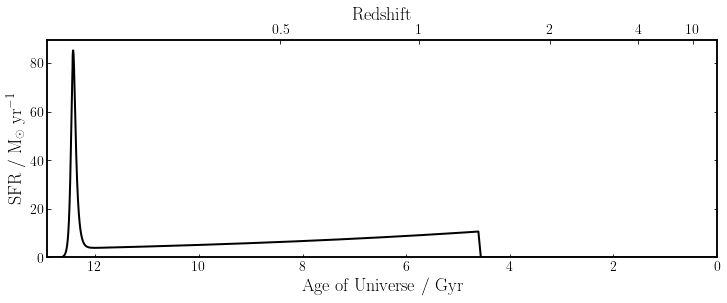

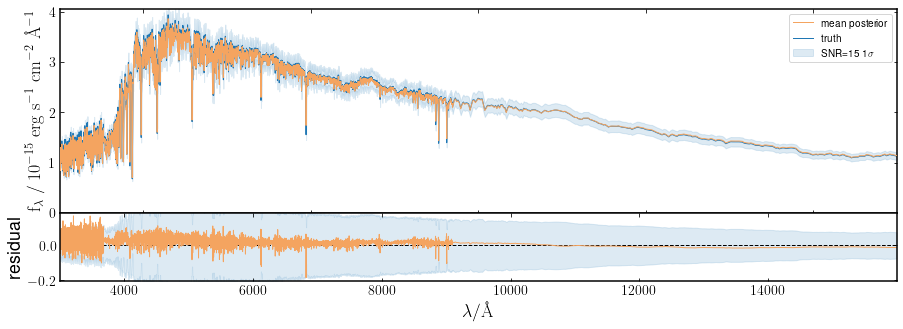

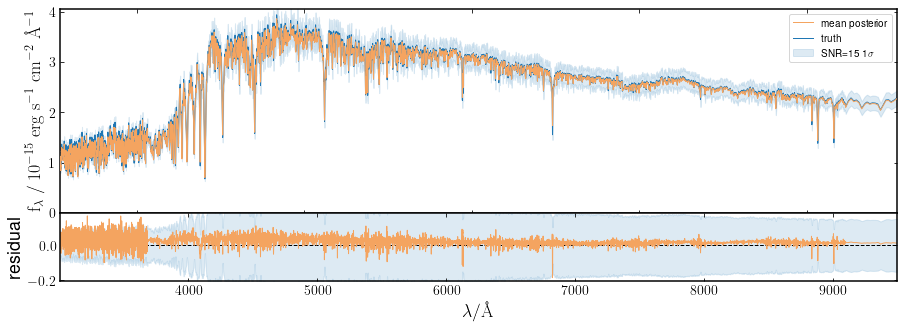

In [96]:
# mean posterior parameters
model_components = make_model_components(0.48725416288891404, 0.4534021950658471, 8.32422128481748, 
                                         7.417468391618491, 10.792385576549103, 1.6726419476224628, 
                                         0.4868348461841876, 403.6313286897695, 0.1635885030271739, 
                                         0.039994732335786626)
model_mean = pipes.model_galaxy(model_components, spec_wavs=wavelengths)
fig = model_mean.sfh.plot()

plot_spec(wavelengths, spectrum, model_mean.spectrum)
plot_spec(wavelengths, spectrum, model_mean.spectrum, limit_to_9500=True)

Next, randomly pick 10 sets of posterior samples and use them to construct a model spectrum, plot against true spectrum

sample no.1


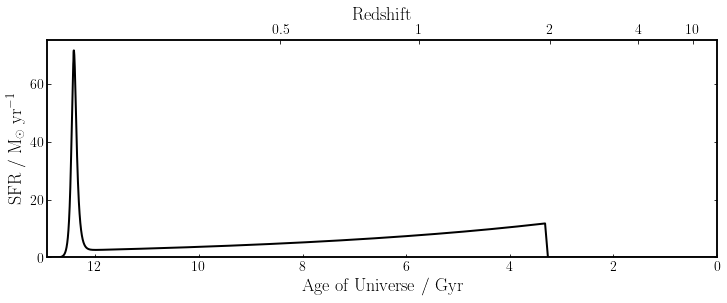

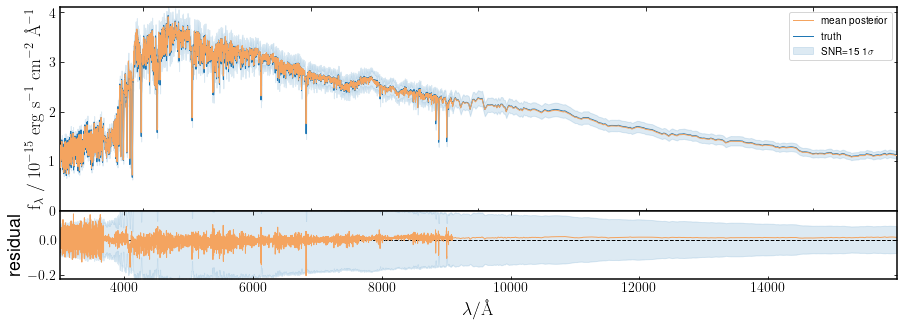

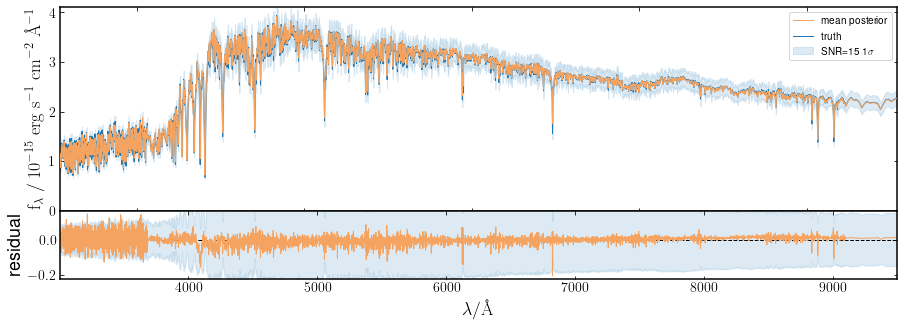

sample no.2


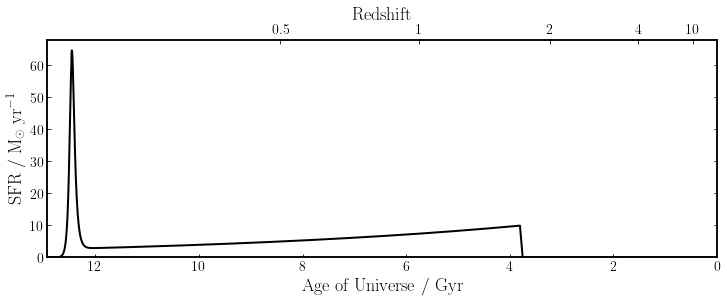

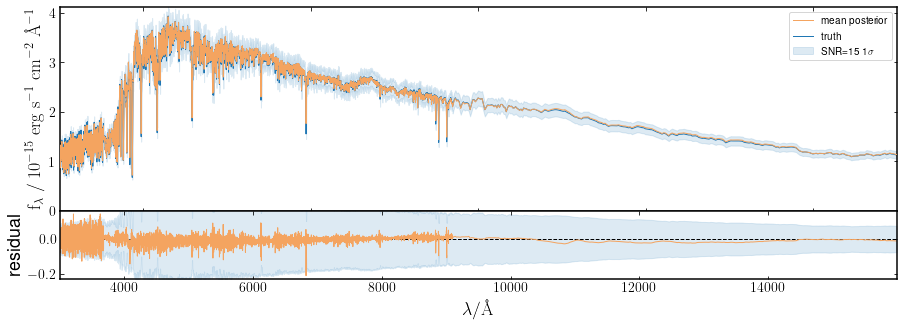

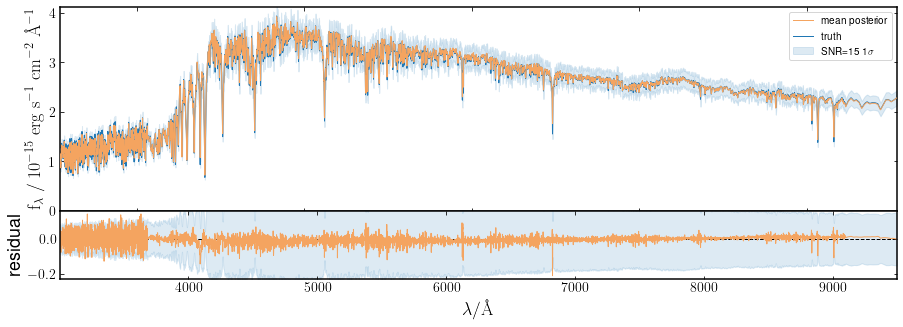

sample no.3


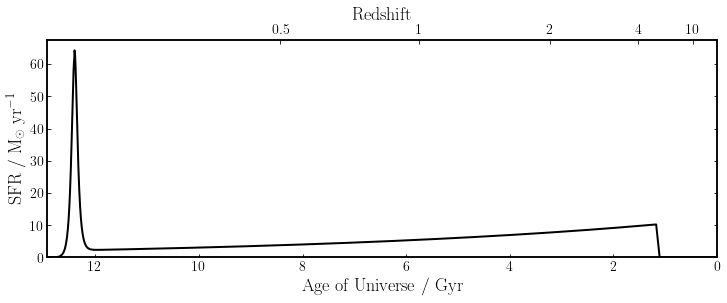

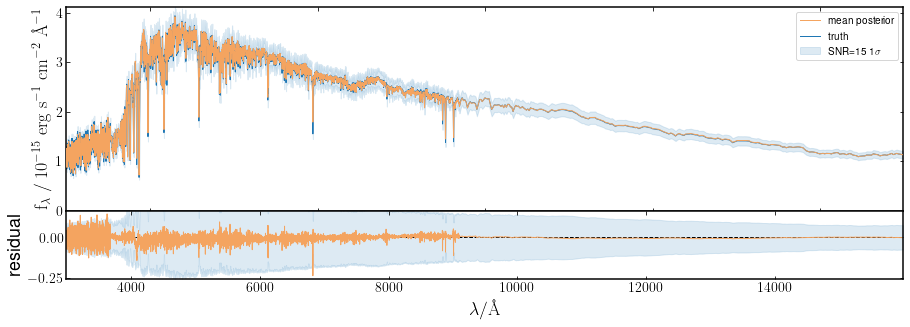

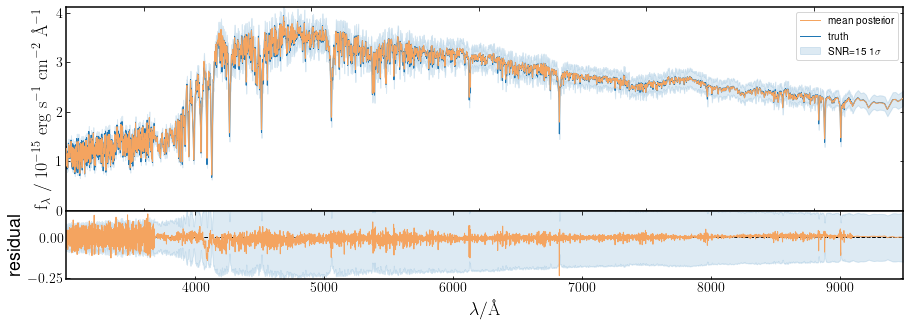

sample no.4


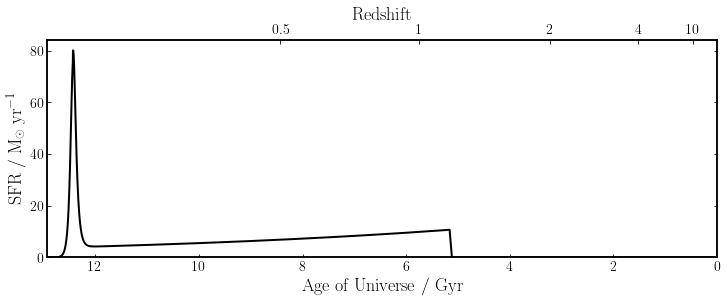

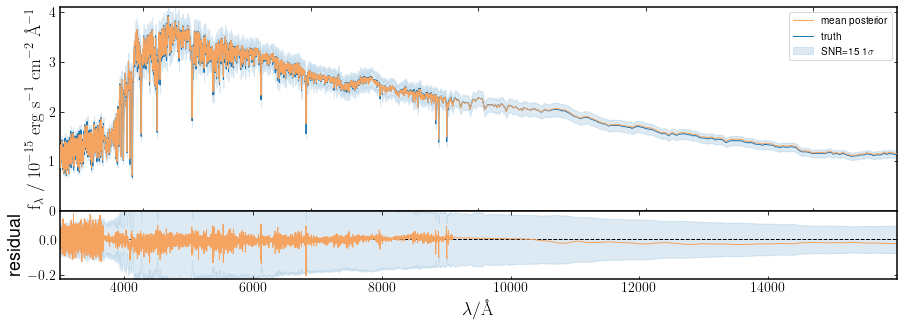

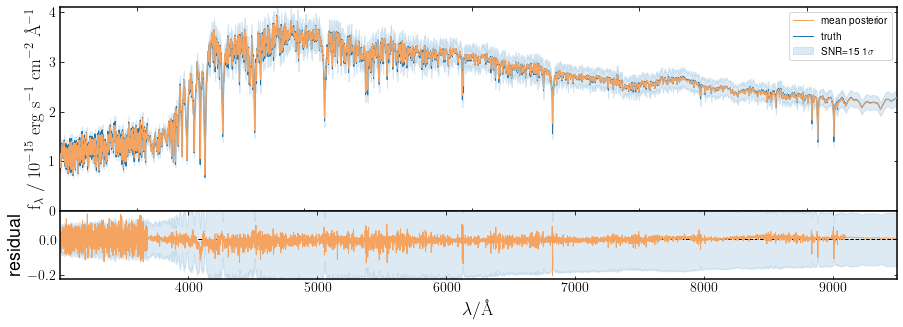

sample no.5


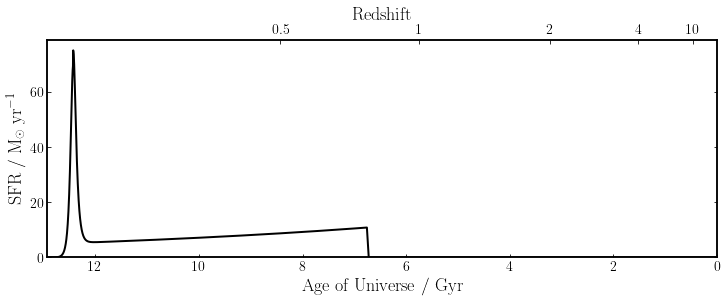

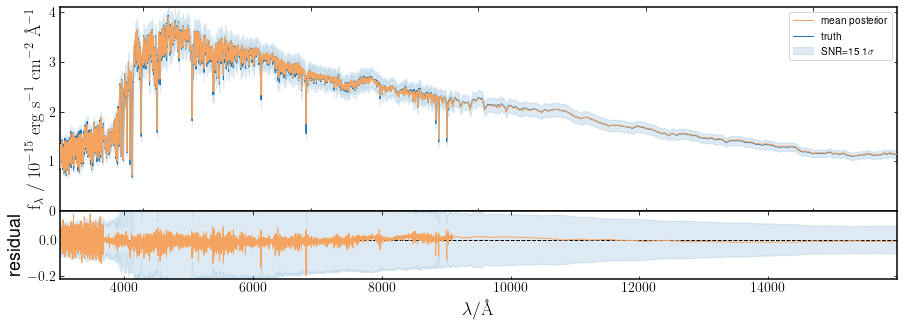

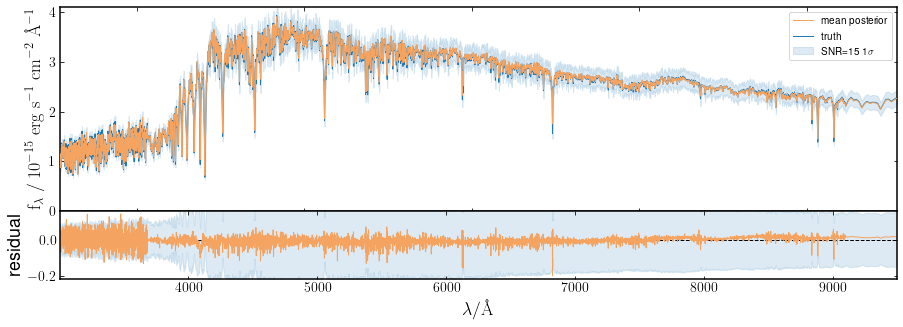

sample no.6


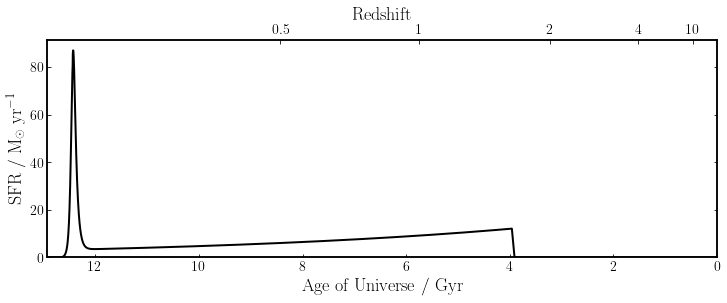

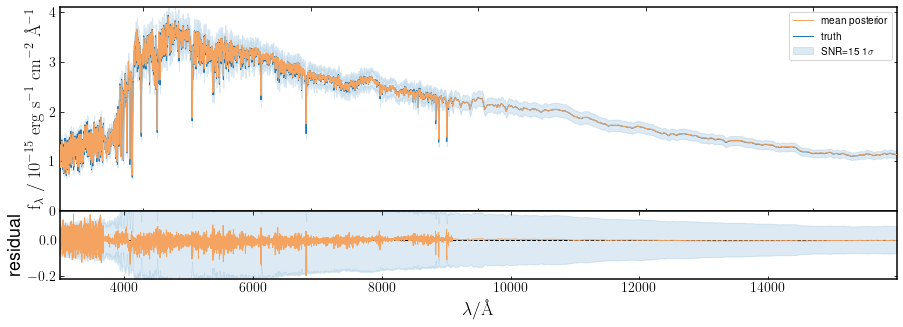

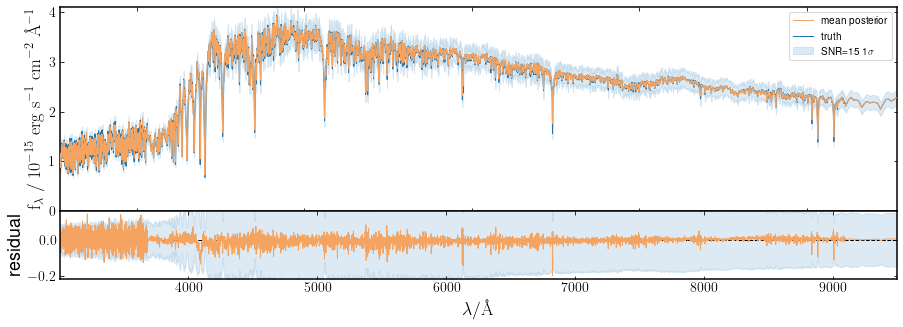

sample no.7


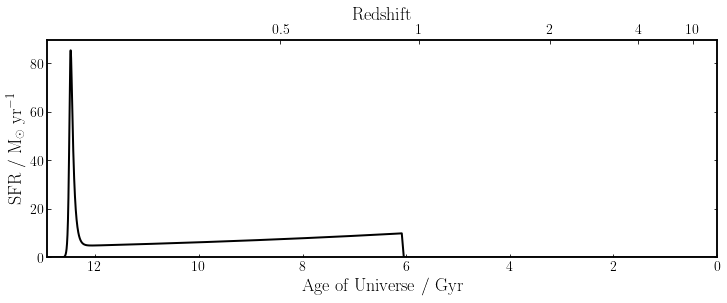

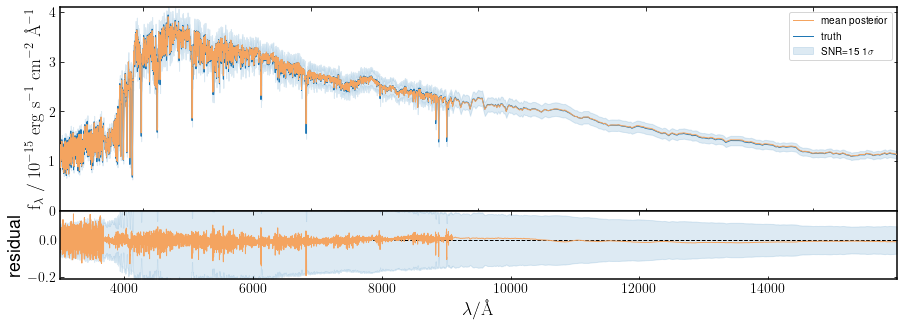

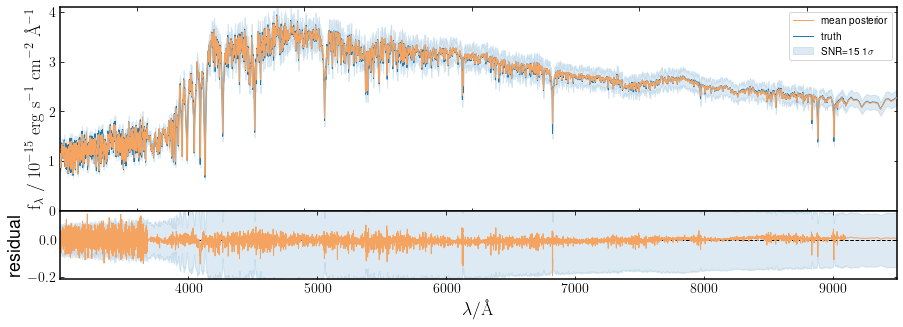

sample no.8


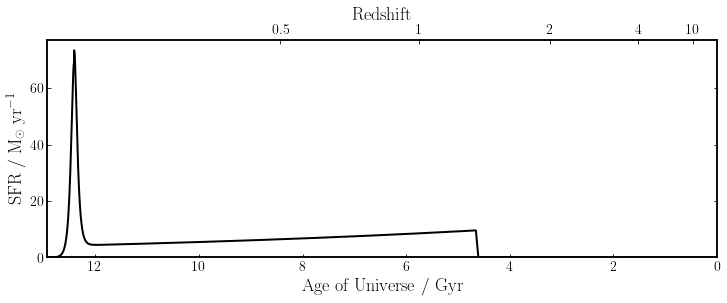

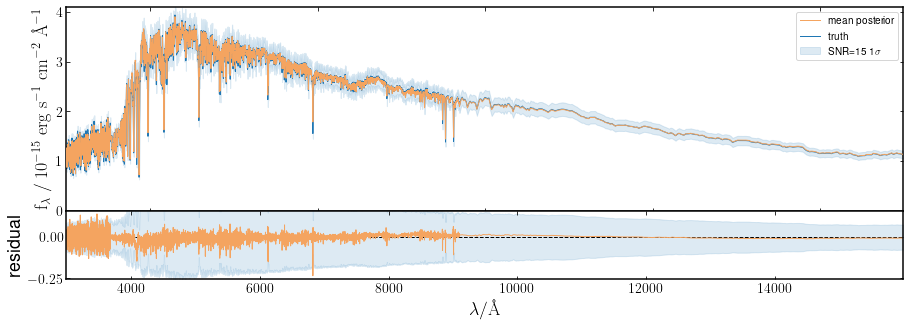

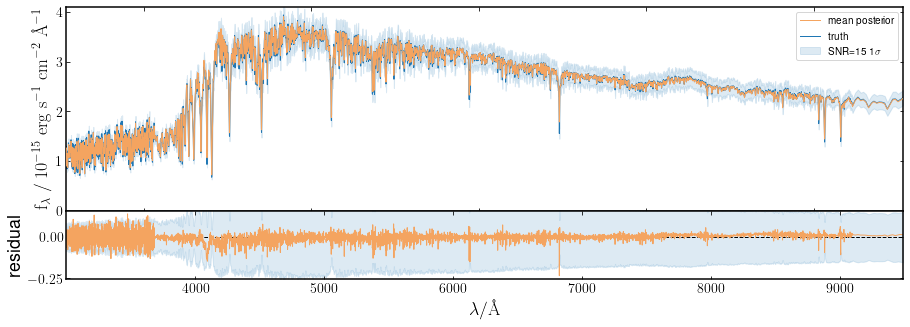

sample no.9


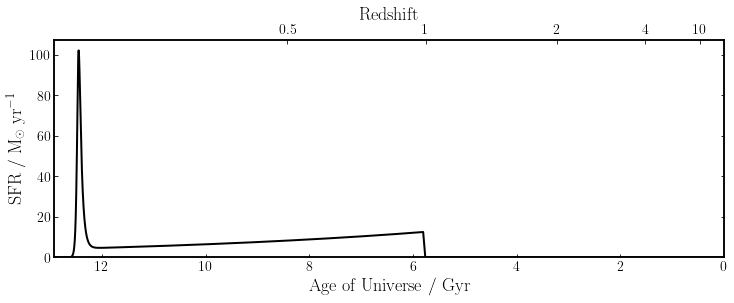

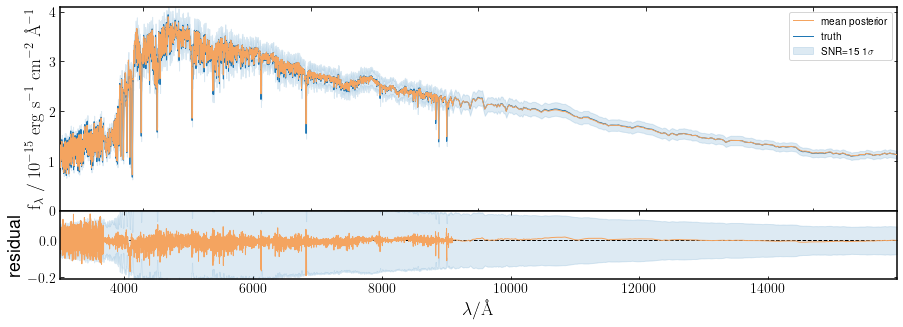

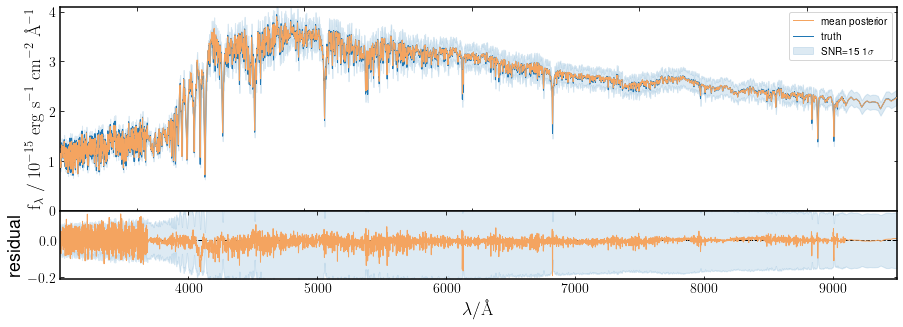

sample no.10


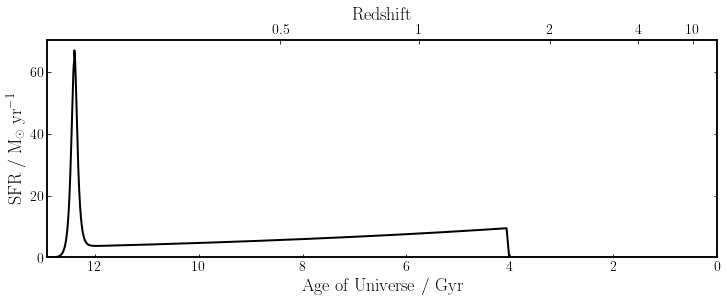

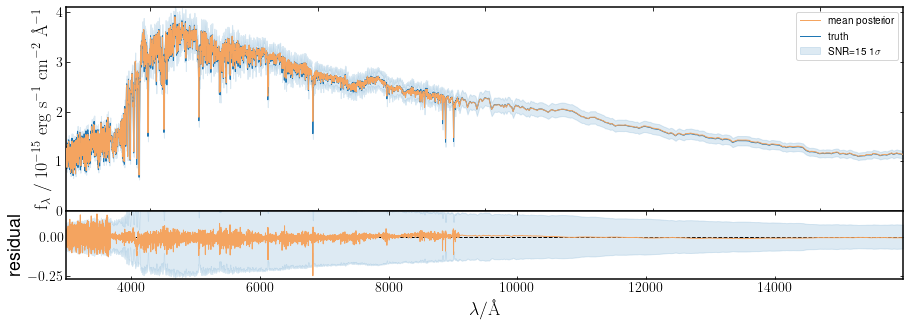

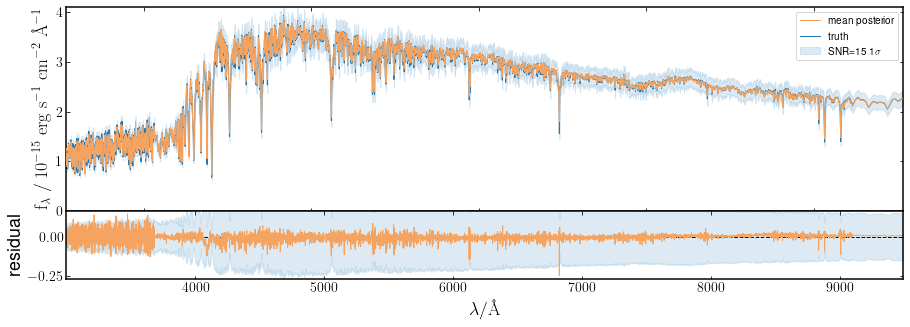

In [97]:
# 10 random posterior samples
samps = [
    # Av, n, age, tau, massformed, metallicity, burstage, alpha, fburst, redshift
    [0.3523617345105795, 0.5320954715022403, 9.624956161243464, 5.73111901411084, 10.801046602187913, 1.5436495075542522, 0.502828593571729, 341.0583694440203, 0.14682834086211896, 0.039995102544691616],
    [0.27212755608652134, 0.688271212151613, 9.167243196639681, 6.702825386544916, 10.75356819956079, 1.7847173878101599, 0.46430556227465314, 358.50655104962874, 0.14368596013164367, 0.03998872267683109],
    [0.331567649869271, 0.5345959648238527, 11.799680928794027, 7.313038078674857, 10.836816631626828, 1.6215134708117331, 0.5216209028603266, 257.53258053456597, 0.1387355323469973, 0.03999984608650529],
    [0.5191106557920033, 0.4388202930207035, 7.806465371317537, 7.348511408526255, 10.78125317988556, 1.7478176660412943, 0.4917926633305053, 306.57897404006377, 0.17789949553990578, 0.03998499995424834],
    [0.5258047302086081, 0.43916592917902336, 6.168535700571395, 7.767965643629241, 10.731857519477213, 1.7136699824020907, 0.4938929593403498, 295.6682335846732, 0.18632213294928374, 0.03999842865509186],
    [0.5023917240595106, 0.39562438889854956, 8.976365024104531, 6.478633821808633, 10.831851880125363, 1.5779758288315713, 0.4873745950579199, 412.3188036532805, 0.15215040828320847, 0.039995205510941476],
    [0.4081664246907226, 0.5241573228453572, 6.868913777717366, 8.458655994177827, 10.722379414499581, 1.728494424749134, 0.434368765983104, 712.1226598371336, 0.15131382788604394, 0.03999528525225306],
    [0.5400892319738607, 0.43151445625106255, 8.270174739388752, 9.50791180970405, 10.791942979573744, 1.6259889021254823, 0.5148652430836326, 247.06162387424928, 0.1751467715078382, 0.0399953359036771],
    [0.5837907281537132, 0.41563504149561825, 7.155021609483121, 6.3649199204950975, 10.794564941891537, 1.5140345271178661, 0.45766827396120024, 611.5586892251737, 0.16416227286907492, 0.0399931991461018],
    [0.4365215816886285, 0.4891297256985736, 8.906708977515937, 8.473387050474765, 10.78106610335398, 1.6550420998291417, 0.5179554322141958, 245.0933882783924, 0.16543119293462985, 0.040002351850491905]
]

samp_spectra = []
for i,samp in enumerate(samps):
    print('sample no.'+str(i+1))
    model_components = make_model_components(*samp)
    model_samp = pipes.model_galaxy(model_components, spec_wavs=wavelengths)
    samp_spectra.append(model_samp.spectrum)
    fig = model_samp.sfh.plot()

    plot_spec(wavelengths, spectrum, model_samp.spectrum)
    plot_spec(wavelengths, spectrum, model_samp.spectrum, limit_to_9500=True)

All comparisons at once

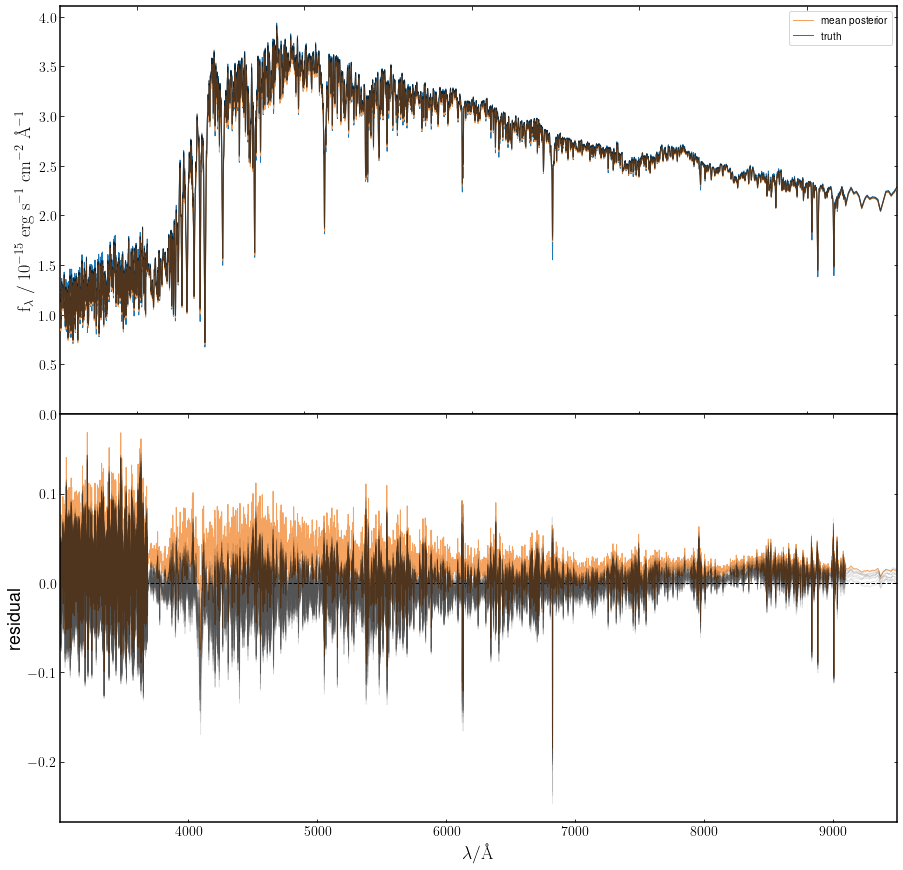

In [86]:
fig = plt.figure(figsize=[15,15])
gs = fig.add_gridspec(2,1, hspace=0)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

to_ind = [wavelengths<9500]

y_scale = pipes.plotting.add_spectrum(model_mean.spectrum[to_ind], ax1, label='mean posterior', lw=1, color='sandybrown')
ax1.plot(wavelengths[to_ind], spectrum[to_ind][:,1]*10**-y_scale, label='truth', lw=1)
for samp_spec in samp_spectra:
    pipes.plotting.add_spectrum(samp_spec[to_ind], ax1, lw=1, color='k', alpha=0.1)
ax1.legend()

ax2.axhline(0, color="black", ls="--", lw=1)
ax2.plot(wavelengths[to_ind], (spectrum[:,1][to_ind] - model_mean.spectrum[:,1][to_ind])*10**-y_scale, label='mean posterior', lw=1, color='sandybrown')
for samp_spec in samp_spectra:
    ax2.plot(wavelengths[to_ind], (spectrum[:,1][to_ind] - samp_spec[:,1][to_ind])*10**-y_scale, lw=1, color='k', alpha=0.1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel("$\\lambda / \\mathrm{\\AA}$")
ax2.set_ylabel('residual')

plt.show()

## Conclusions
There is virtually no deviation between the truth spectrum and the posterior SFH-based model predictions. If there is deviations, it is well within the observational uncertainties of a high SNR=15. So this suggests outshining is an inheriet issue with the current state of science and instead of chasing the pipe dream of fixing outshining (at least in this terrible setup), we should focus on making our uncertainties realistic.